# 8 | BINARY VARIABLES AND SAMPLE PROPORTIONS

>Dr JH Klopper

![](GWU_Logo_Horizontal.png)

<p xmlns:cc="http://creativecommons.org/ns#" xmlns:dct="http://purl.org/dc/terms/"><span property="dct:title">This notebook</span> by <span property="cc:attributionName">Dr JH Klopper</span> is licensed under <a href="http://creativecommons.org/licenses/by-nc-nd/4.0/?ref=chooser-v1" target="_blank" rel="license noopener noreferrer" style="display:inline-block;">Attribution-NonCommercial-NoDerivatives 4.0 International<img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/cc.svg?ref=chooser-v1"><img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/by.svg?ref=chooser-v1"><img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/nc.svg?ref=chooser-v1"><img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/nd.svg?ref=chooser-v1"></a></p>

## Introduction

We summarize variables with a categorical level of measurement by calculating the frequency of each category in the sample space of the variable. We can also express the relative frequency or proportion of each category in the sample by simply diving each frequency by the sample size.

In this notebook, we will learn how to calculate sample proportions and how we can use sample proportions to learn about population proportions using hypothesis tests and confidence intervals.

We start by revisiting the $Z$ distribution and see how it may help us to consider a claim about proportions for a binary variable. We also investigate a new sampling distribution called the $\chi^2$ distribution, which is used to test hypotheses about population proportions. We also explore two statistical tests in this notebook. They are the one-sample $Z$ test for proportion test and the $\chi^{2}$ goodness of fit test.

## Importing packages

We use the following pakcages in this notebook.

In [92]:
using Distributions
using HypothesisTests
using Plots
using StatsPlots
using PlotThemes
using LaTeXStrings

We use the `GR` backend for static plotting in this notebook.

In [93]:
gr()

Plots.GRBackend()

The plotting theme is set to `vibrant`.

In [94]:
theme(:vibrant)

## One-sample $Z$ test for proportion

Binary variables are categorical variables that have only two categories. Flipping a two-sided coin has two possible outcomes: heads or tails. In a sample of coin flips, we can calculate the proportion of heads and tails. The proportion of heads is then the number of heads divided by the sample size and the proportion of tails is the number of tails divided by the sample size. The sum of the proportions of heads and tails is always 1.

In statistical analysis we have unique terms for the two outcomes of a binary variable. The outcome that we are interested in is called the _success_ and the other outcome is called the _failure_. We are free to choose based on our research question.

The proportion of successes is called the population proportion and is denoted by the Greek letter $\rho$ or somtimes by the letter $p$. The sample proportion is an estimate of the population proportion and is denoted by $\hat{p}$. Since the proportion of successes and failures sum to $1$, we can calculate the proportion of failures by subtracting the proportion of successes from $1$. The population proportion of failure is then denoted by $1 - p$ and the sample proportion of failures is denoted by $1 - \hat{p}$.

If the sample size $n$ is large enough and the population proportion of success $p$ is not _too close_ to $0$ or $1$, the sampling distribution of the sample proportion $\hat{p}$ is approximately normal. The mean and the variance of the sample proportion $\hat{p}$ is given in the table below.

| Parameter | Value |
|-----------|-------|
| Mean      | $p$   |
| Variance  | $\frac{p(1-p)}{n}$ |

Note how this relates to the mean and standard error of the sample mean $\overline{X}$ given in the table below.

| Parameter | Value |
|-----------|-------|
| Mean      | $\mu$ |
| Variance  | $\frac{\sigma^2}{n}$ |

Under the mentioned assumptions of sample size and value of $p$ above, we have that $\hat{p}$ is approximately normally distributed as shown in (1).

$$
\hat{p} \sim \text{Normal} \left(p, \, \frac{p \, (1-p)}{n}\right) \tag{1}
$$

For this sampling distribution we have to confirm that $np \geq 5$ and $n(1-p) \geq 5$ (or $10$ is some textbooks). If so, we can use the standard normal distribution to calculate probabilities and confidence intervals, where we calculate $Z$ as shown in (2).

$$
\begin{align*}
&Z = \frac{\hat{p} - p_{0}}{\sqrt{\frac{p_{0} \left( 1 - p_{0} \right) }{n}}} \quad \text{where} \quad p_{0} = \text{hypothesized population proportion} \\ \\
&Z \sim \text{Normal} \left( 0 , 1^{2} \right) \tag{2}
\end{align*}
$$

The $Z$ value is used to compare to a critical value, to calculate the $p$-value, and to calculate a confidence interval.

For hypothesis testing we would then have a null hypothesis $H_{0}: \, p = p_{0}$ with a two-tailed alternative hypothesis $H_{1}: \, p \ne p_{0}$. We could have a one-tailed alternative hypothesis as well, but we will focus on the two-tailed alternative hypothesis in this notebook.

We can also calculate the confidence interval for the population proportion $p$ using the sample proportion $\hat{p}$ as long as $n \hat{p} \geq 5$ and $n \left( 1 - \hat{p} \right) \geq 5$. The confidence interval is calculated as shown in (3), where $c$ is the confidence coefficient for a level of significance of $1 - \alpha$, where $\alpha$ is the chosen level of significance (Type I error rate).

$$
\hat{p} \pm c \sqrt{\frac{\hat{p} \left( 1 - \hat{p} \right)}{n}} \tag{3}
$$

If we let $\alpha = 0.05$ we can calculate the confidence coefficient $c$ using the `quantile` function.

In [95]:
# Calculate the confidence coefficent for a 95% confidence level using the standard normal distribution and the qunatile function
quantile(Normal(), 0.975)

1.9599639845400576

We see that $c = 1.96$ for a $95\%$ confidence interval. In the code cell below we also calculate $c$ for $\alpha = 0.01$ and $\alpha = 0.10$ using list comprehension.

In [96]:
# Calculate the confidence coefficent for a 99% and a 90% confidence level using the standard normal distribution and the quatile function
[quantile(Normal(), l) for l in [1-(0.01/2), 1-(0.1/2)]]

2-element Vector{Float64}:
 2.5758293035489053
 1.6448536269514717

| $\alpha$ | Confidence level $1-\alpha$ | Confidence coefficient $c$ |
|----------|-----------------------------|---------------------------|
| $0.01$   | $99\%$                      | $2.58$                    |
| $0.05$   | $95\%$                      | $1.96$                    |
| $0.10$   | $90\%$                      | $1.64$                    |

Let's put this knowledge to use by considering an illustrative example.

Researchers consider the population of people with insulin-dependent diabetics mellitus. They are interested in the proportion of people with insulin-dependent diabetes mellitus who believe that poor glucose control puts them at risk for kidney disease. Under the null hypothesis this proportion is believed to be $0.5$ or $50$%. The researhers collect data from $737$ random subjects in the population and record that $295$ believe that poor glucose control puts them at risk for kidney disease. The researchers want to test the claim that the population proportion of people with insulin-dependent diabetes mellitus who believe that poor glucose control puts them at risk for kidney disease is not $50$% using a $5\%$ level of significance.

In our usual eight step process we start by summarizing the problem.

__Step 0__ Summarize the problem

The random variable is binary with sample space $S = \{ \text{believe to be at risk} , \text{do not believe to be at risk} \}$. We choose those that believe that poor glucose control puts them at risk for kidney disease as the _success_ category.

| Variable | Description |
|----------|-------------|
| $n$      | $737$       |
| $\hat{p}$| $295/737$   |
| $p_{0}$  | $0.5$       |

__Step 1__ State the parameter of interest

The parameter of interest in this research project is the population proportion of people with insulin-dependent diabetics mellitus who believe that poor glucose control puts them at risk for kidney disease, $p$.

__Step 2__ State the null and alternative hypothesis

The population proportion under the null hypothesis $p_{0}$ is $0.5$. The problem statement refers to a two-tailed alternative hypothesis. The hypothesis are written in (4).

$$
\begin{align*}
&H_{0}: \, p = 0.5 \\
&H_{1}: \, p \ne 0.5 \tag{4}
\end{align*}
$$

__Step 3__ Choose the level of significance

The level of significance is $\alpha = 0.05$.

__Step 4__ Choose a statistical test and consider the assumptions for the test

We choose a $Z$ test for proportions. The assumptions are that the sample size is large enough and that the population proportion is not too close to $0$ or $1$. We calculate $n p$ and $n \left( 1 - p \right)$ below.

In [97]:
# Calculate np
737 * 0.5

368.5

In [98]:
# Calculate n (1-p)
737 * (1 - 0.5)

368.5

Both values are larger than or equal to $5$ and $p_{0} = 0.5$ so we can proceed with the test.

__Step 5__ State the distribution of the test statistic under the null hypothesis and calculate its value

The test statistic is $Z$ and we state its distribution under the null hypothesis as shown in (5).

$$
Z \sim \text{Normal} \left( 0 , 1^{2} \right), \text{ under the null hypothesis} \tag{5}
$$

We need to calculate $\hat{p}$ which is $295 \div 737$ done in the code cell below.

In [99]:
# Calculate the sample proportion
295 / 737

0.40027137042062416

We calculate $Z$ in (6) using the formula in (2).

$$
\begin{align*}
&Z = \frac{\hat{p} - p_{0}}{\sqrt{\frac{p_{0} \left( 1 - p_{0} \right) }{n}}} \\ \\
&Z = \frac{\frac{295}{737} - 0.5}{\sqrt{\frac{0.5 \left( 1 - 0.5 \right) }{737}}} \\ \\
&Z \approx -5.415
\end{align*} \tag{6}
$$

We confirm the calculation in the code cell below.

In [100]:
# Confirm the calculation and assign the result to a variable T_statistic
T_statistic = (295 / 737 - 0.5) / sqrt(0.5 * (1 - 0.5) / 737)
T_statistic

-5.414814594825616

__Step 6__ Use decision rules

The standard normal distribution critical value for a two-tailed alternative hypothesis using a $5\%$ level of significance is calculated using the `quantile` function in the code cell below.

In [101]:
# Use the quantile function to calculate the lower criticla value for a 95% confidence level using the standard normal distribution
# Assign the result to the variable lower_critical_value
lower_critical_value = quantile(Normal(), 0.025)
lower_critical_value

-1.9599639845400592

In [102]:
# Use the quantile function to calculate the upper criticla value for a 95% confidence level using the standard normal distribution
# Assign the result to the variable upper_critical_value
upper_critical_value = quantile(Normal(), 0.975)
upper_critical_value

1.9599639845400576

To use the critical value approach to hypothesis testing we determine if $\lvert Z \rvert > \lvert Z_{\text{crit}} \rvert$.

In [103]:
# Verify that the absolute value of t_statistic is larger than upper_critical_value
abs(T_statistic) > upper_critical_value

true

The absolute value of the $Z$ statistic is more than the (upper) critical value and we reject the null hypothesis and accept the alternative hypothesis. We also calculate a $p$-value in the code cell below.

In [104]:
# Calculate a p value for a Z statitic of -5.415 using the standard normal distribution and a two-tailed test
2 * cdf(Normal(), -5.415)

6.128870589328996e-8

We have that $p < \alpha$. Using this decision rule we also reject the null hypothesis and accept the alternative hypothesis.

__Step 7__ State the conclusion

There is enough evidence in the data at the $5$% level of significance to conclude that the population proportion of people with insulin-dependent diabetics mellitus who believe that poor glucose control puts them at risk for kidney disease is not $50$%. In fact, it is lower at approximately $40$%.

As before we visualize the results of our analysis. We used the standard normal distribution, which is plotted below showing the critical values $Z \pm -1.96$ as red lines.

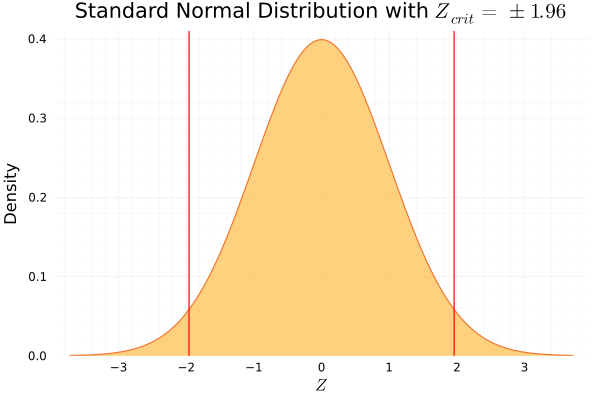

In [105]:
# Plot the PDF of the standard normal distribution
# Add vertical lines at Z = -1.96 and Z = 1.96
# Add a title, x-axis label, y-axis label, and remove the legend
# Set the y-axis limits to 0 and 0.41

plot(
    Normal(0, 1),
    fill=(0, .5,:orange),
    title = L"Standard Normal Distribution with $Z_{crit} = \pm 1.96$",
    xlabel = L"Z",
    ylabel = "Density",
    legend = false,
    ylim = (0, 0.41)
)
plot!([-1.96, -1.96], [0, 0.45], seriestype = :straightline, color = :red)
plot!([1.96, 1.96], [0, 0.45], seriestype = :straightline, color = :red)

Our test statistic values $Z$ is shown as the black line below and is clearly in the rejection region, that is, _beyond_ or more extreme than the critical value. In the plot we zoom in on the lower tail. Remember that we have the same _picture_ in the upper tail.

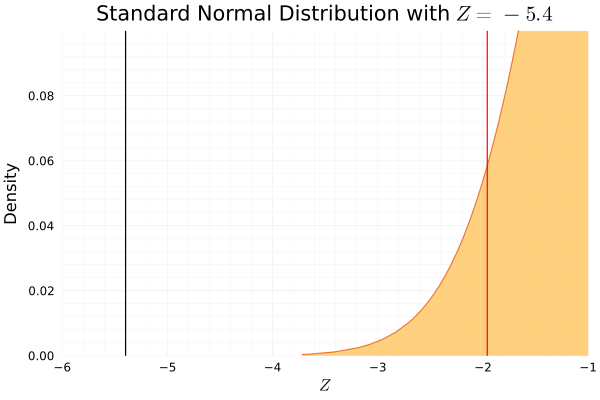

In [106]:
# Plot the PDF of the standard normal distribution
# Add vertical lines at Z = -5.4 and Z = -1.96
# Add a title, x-axis label, y-axis label, and remove the legend
# Set the y-axis limits to 0 and 0.1
# Remove the legend

plot(
    Normal(0, 1),
    fill=(0, .5,:orange),
    title = L"Standard Normal Distribution with $Z = - 5.4$",
    xlabel = L"Z",
    ylabel = "Density",
    legend = false,
    xlim = (-6, -1),
    ylim = (0, 0.1)
)
plot!([-1.96, -1.96], [0, 0.45], seriestype = :straightline, color = :red)
plot!([-5.4, -5.4], [0, 0.45], seriestype = :straightline, color = :black)

We can also calculate the confidence interval for the population proportion $p$ using the sample proportion $\hat{p}$ as long as $n \hat{p} \geq 5$ and $n \left( 1 - \hat{p} \right) \geq 5$, which we confirm below.

In [107]:
# Calculate the sample size times the sample proportion
737 * (295/737)

295.0

In [108]:
# Calculate the sample size times the 1 minus the sample proportion
737 * (1 - 295/737)

441.99999999999994

We can calculate the confidence interval using the formula in (3) and the confidence coefficient $c = 1.96$ for a $95\%$ confidence interval, shown in (7).

$$
\begin{align*}
&\hat{p} \pm c \sqrt{\frac{\hat{p} \left( 1 - \hat{p} \right)}{n}} \\ \\
&0.4 \pm 1.96 \sqrt{\frac{0.4 \left( 1 - 0.4 \right)}{737}} \\ \\
&0.4 \pm 0.035
\end{align*} \tag{7}
$$

The results are confirmed using Julia code below.

In [109]:
# Calculate the margin of error
1.96 * sqrt((295/737) * (1 - 295/737) / 737)

0.035373414428486905

We can calculate the lower and the upper bounds which we do with Julia in the code cells below.

In [110]:
# Calculate the lower bound
(295/737) - 1.96 * sqrt((295/737) * (1 - 295/737) / 737)

0.36489795599213726

In [111]:
# Calculate the upper bound
(295/737) + 1.96 * sqrt((295/737) * (1 - 295/737) / 737)

0.43564478484911107

We conclude that the population proportion of people with insulin-dependent diabetics mellitus who believe that poor glucose control puts them at risk for kidney disease is between $36.5$% and $43.6$% with $95$% confidence. Note that the hypothesized population proportion $p_{0}$ is not in the confidence interval and we can conclude that the population proportion is not $50$% with $95$% confidence.

We need not use the one-sample $Z$ test for proportions for hypothesis tests in the case of a binary variable. Next we explore that $\chi^{2}$ goodness of fit test.

## $\chi^{2}$ goodness of fit test for a binary variable

An alternative to the one-sample $Z$ test for proportions iwe have the $\chi^{2}$ goodness of fit test. This test allows us to explore a new probability distribution that we have not seen before. The $\chi^{2}$ distribution.

The $\chi^{2}$ distribution is a family of distributions that depend on the degrees of freedom, $\nu$. The $\chi^{2}$ distribution is a right-skewed distribution with a mean $\nu$ and a variance of $2 \nu$.

The degrees of freedom $\nu$ is simple to calculate in the case of the $\chi^{2}$ goodness of fit test. It is the number of categories of the categorical variable under consideration minus one. For a binary variable we have two categories, so the degrees of freedom is $\nu = 2 - 1 = 1$.

We plot the $\chi^{2}$ distribution for $\nu = 1,3$, and $10$ (orange, blue, and green respectively) in the code cell below. Note that our test statitic is $X^{2}$ and that is distributed as shown in (8).

$$
X^{2} \sim \chi^{2} \left( \nu \right) \tag{8}
$$

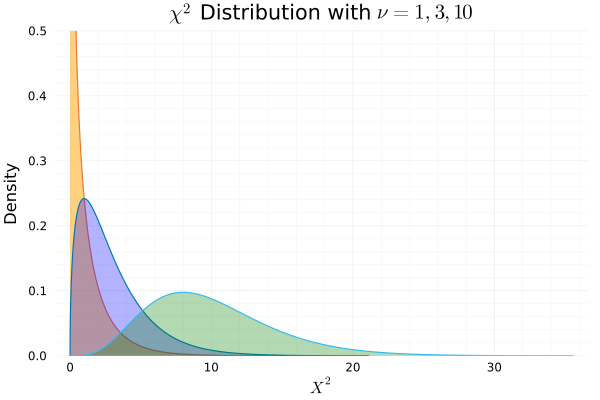

In [112]:
# Plot the χ2 distribution for 1, 3, and 10 degrees of freedom

plot(
    Chisq(1),
    fill=(0, .5,:orange),
    title = L"$\chi^{2}$ Distribution with $\nu = 1, 3, 10$",
    xlabel = L"X^{2}",
    ylabel = "Density",
    legend = false,
    ylim = (0, 0.5)
)
plot!(
    Chisq(3),
    fill=(0, .3,:blue)
)
plot!(
    Chisq(10),
    fill=(0, .3,:green)
)

To calculate a critical value or a $p$ value, we consider the upper tail. In the code cell below we set $\nu=1$ (for a binary variable) and calculate the critical value $X^{2}_{\text{crit},\nu,1-\alpha}$ where our chosen level of significance is $\alpha = 0.05$. The critical value is calculated using the `quantile` function.

In [113]:
# Calculate the critical value for a level of significance of 5% and 1 degree of freedom using the χ2 distribution
quantile(Chisq(1), 0.95)

3.8414588206941245

Our critical value is $3.841$ and is written in (9).

$$
X^{2}_{\text{crit}, \, \nu,1-\alpha} = X^{2}_{\text{crit},\, 1, \, 0.95} = 3.841 \tag{9}
$$

We visualize the critical value in the plot below with the critical value as the red line.

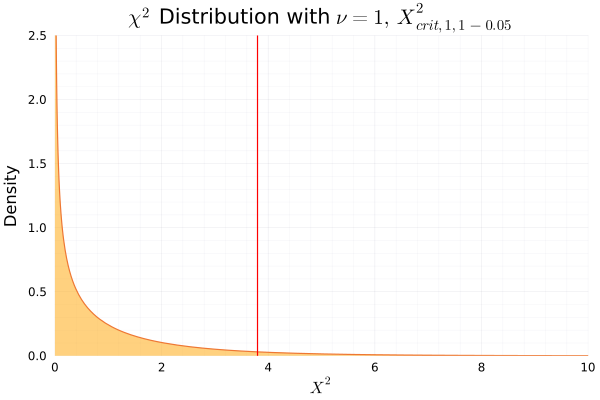

In [114]:
# Plot the χ2 distribution for 1
# Show the critical value at 3.841

plot(
    Chisq(1),
    fill=(0, .5,:orange),
    title = L"$\chi^{2}$ Distribution with $\nu = 1, \, X^{2}_{crit,1,1-0.05}$",
    xlabel = L"X^{2}",
    ylabel = "Density",
    legend = false,
    xlim = (0, 10),
    ylim = (0, 2.5)
)
plot!([3.8, 3.8], [0, 0.45], seriestype = :straightline, color = :red)

The area under the curve to the right of the critical value line in the plot above is the region of rejection for $\alpha=0.05$ and represents $5$% of the area under the curve.

The formula for calculating the test statistic $X^{2}$ is shown in (10).

$$
X^{2} = \sum_{i=1}^{k} \frac{\left( O_{i} - E_{i} \right)^{2}}{E_{i}} \tag{10}
$$

The $\Sigma$ symbol denotes the sum of the terms. The $i$ is a counter and starts at $1$, increments by $1$ for each term up to $k$, which is the number of categories in the categorical variables. The $O_{i}$ is the observed frequency and the $E_{i}$ is the expected frequency. The expected frequencies are the frequencies that we would expect under the null hypothesis.

Our last consideration is that of the minimum number of expected frequencies. We need to have at least $5$ expected frequencies in each category to use the $\chi^{2}$ goodness of fit test.

As illustrative example, we reconsider the research problem of the population of people with insulin-dependent diabetics mellitus. We are interested in the proportion of people with insulin-dependent diabetes mellitus who believe that poor glucose control puts them at risk for kidney disease. We have a sample of $737$ random subjects in the population and record that $295$ believe that poor glucose control puts them at risk for kidney disease. The researchers want to test the claim that the proportion of people with insulin-dependent diabetes mellitus who believe that poor glucose control puts them at risk for kidney disease is not $50$% using a $5$% level of significance.

As before, we follow the steps set out for hypothesis testing. We have summarized the problem before, but this time, we need to add the expected frequencies to the summary.

__Step 0__ Summarize the problem

There are $737$ subjects in the sample. Under the null hypothesis we state that $0,.5$ of the population with insulion-dependent diabetes mellitus believes that poor glucose control puts them at risk for kidney disease. The expected frequency of success is therefor $737 \times 0.5 = 368.5$ and the expected frequency of failure is $737 \times 0.5 = 368.5$.

Since our variable is binary, we have $k=2$ categories and the degrees of freedom is $\nu = 2 - 1 = 1$. The observed frequency of the _success_ category is $295$ and the observed frequency of the _failure_ category is $737-295 = 442$. We summarize all of the information in the table below.

| Variable | Description |
|----------|-------------|
| $k$      | $2$       |
| $\nu$      | $1$     |
| $O_{1}$ | $295$       |
| $O_{2}$ | $442$       |
| $E_{1}$ | $368.5$     |
| $E_{2}$ | $368.5$     |

__Step 1__ State the parameter of interest

The parameter of interest in this research project is the population proportion of people with insulin-dependent diabetics mellitus who believe that poor glucose control puts them at risk for kidney disease, $p$.

__Step 2__ State the null and alternative hypothesis

$$
\begin{align*}
&H_{0}: \, p = 0.5 \\
&H_{1}: \, p \ne 0.5 \tag{11}
\end{align*}
$$

__Step 3__ Choose the level of significance

The level of significance is $\alpha = 0.05$.

__Step 4__ Choose a statistical test and consider the assumptions for the test

We will use the $\chi^{2}$ goodness of fit test. The assumptions are that the expected frequencies are large enough. In this case, the expected frequencies are $368.5$ and $368.5$ which are at least $5$.

__Step 5__ State the distribution of the test statistic under the null hypothesis and calculate its value

We write the distribution of our test statistic in (12).

$$
X^{2} \sim \chi^{2} \left( 1 \right), \text{ under the null hypothesis} \tag{12}
$$

Now we use the formula in (10) to calculate the test statistic $X^{2}$, shown in (13).

$$
\begin{align*}
&X^{2} = \frac{\left( 295 - 368.5 \right)^{2}}{368.5} + \frac{\left( 442 - 368.5 \right)^{2}}{368.5} \\ \\
&X^{2} \approx 29.3 \tag{13}
\end{align*}

The result is confirmed using the code cell below.

In [115]:
# Calculate the test statistic
((295-368.5)^2 / 368.5) + ((442-368.5)^2 / 368.5)

29.3202170963365

__Step 6__ Use decision rules

We case seen that $X^{2}_{\text{crit},1,0.95} = 3.841$. Our test statistic is larger than the critical value so we reject the null hypothesis and accept the alternative hypothesis. We also calculate a $p$-value in the code cell below where we use the `cdf` function. The `cdf` function represents the cumulative distribution function of the probability density function $f \left( x \right)$ of the $\chi^{2}$ distribution, shown in (14) if you are familiar with integral calculus. Note that it is the integral (area under the curve) from $0$ to $X^{2}$. It calculates the area under the curve from $0$ to $X^{2}$. This is not the probability that we want to express, though. We want the probability of the area to the right of $X^{2}$, which is $1 - \text{cdf} \left( X^{2} \right)$.

$$
\text{CDF} \left( X^{2} \right) = \int_{0}^{X^{2}} f \left( x \right) \, dx \tag{14}
$$

In [116]:
# Calculate the p value for the test statistic
1 - cdf(Chisq(1), 29.32)

6.13591186748863e-8

The $p$ values is $0.00000006$. We have that $p < \alpha$. Using this decision rule we also reject the null hypothesis and accept the alternative hypothesis.

__Step 7__ State the conclusion

There is enough evidence in the data at the $5$% level of significance to conclude that the population proportion of people with insulin-dependent diabetes mellitus who believe that poor glucose control puts them at risk for kidney disease is not $50$%. In fact, it is lower at approximately $40$%.

We can also use the $\chi^{2}$ goodness of fit test to consider proportions for more than two categories. We explore this in the next section.

## $\chi^{2}$ goodness of fit test for a multinomial variable

The equation in (3) can be extended to a multinomial variable with $k$ categories. The degrees of freedom is still $\nu = k - 1$.

As illustrative example we consider that the proportion of people in the population with the four ABO blood types are as follows.

- A = $0.41$
- B = $0.1$
- AB = $0.06$
- O = $0.43$

Researchers collect blood samples from $200$ random subjects in the population and record the following frequencies.

- A = $90$
- B = $30$
- AB = $5$
- O = $75$

They calim that the population proportions are not as given above and want to do so using a $5$% level of significance.

To test their claim we follow the usual eight steps.

__Step 0__ Summarize the problem

Given $200$ subjects and the proportions under the null hypothesis, we calculate the expected frequencies as shown in the table below.

| Group | Observed frequency | Expected frequency under $H_{0}$ given $n=200$ |
|-------|--------------------|--------------------|
| A     | $90$               | $200 \times 0.41 = 82$ |
| B     | $30$               | $200 \times 0.1 = 20$ |
| AB    | $5$                | $200 \times 0.06 = 12$ |
| O     | $75$               | $200 \times 0.43 = 86$ |

We have a multinomial variable with $k=4$ categories and the degrees of freedom is $\nu = 4 - 1 = 3$.

__Step 1__ State the parameter of interest

The parameters of interest in this research project are the population proportions of people with the four ABO blood types. We can call these $p_{A}$, $p_{B}$, $p_{AB}$, and $p_{O}$.

__Step 2__ State the null and alternative hypothesis

We state the null and alternative hypothesis in (14).

$$
\begin{align*}
&H_{0}: \, p_{A} = 0.41, \, p_{B} = 0.1, \, p_{AB} = 0.06, \, p_{O} = 0.43 \\
&H_{1}: \, \text{At least two of the population proportions are not as given in the null hypothesis}
\end{align*} \tag{14}
$$

The alternative hypothesis states that at least two of the population proportions are not as given in the null hypothesis. The proportions must sum to $1$ and if one proportion is not as given in the null hypothesis, then at least one other proportion is not as given in the null hypothesis.

__Step 3__ Choose the level of significance

The level of significance is $\alpha = 0.05$.

__Step 4__ Choose a statistical test and consider the assumptions for the test

We choose the $\chi^{2}$ goodness of fit test. The assumptions are that the expected frequencies are large enough. In this case, the expected frequencies are $82$, $20$, $12$, and $86$ which are all at least $5$.

__Step 5__ State the distribution of the test statistic under the null hypothesis and calculate its value

The distribution of the test statistic is shown in (15).

$$
X^{2} \sim \chi^{2} \left( 3 \right), \text{ under the null hypothesis} \tag{15}
$$

We use the formula in (10) to calculate the test statistic $X^{2}$, shown in (16).

$$
\begin{align*}
&X^{2} = \frac{\left( 90 - 82 \right)^{2}}{82} + \frac{\left( 30 - 20 \right)^{2}}{20} + \frac{\left( 5 - 12 \right)^{2}}{12} + \frac{\left( 75 - 86 \right)^{2}}{86} \\ \\
&X^{2} \approx 11.271
\end{align*}
\tag{16}
$$

We confirm the result using the code cell below.

In [117]:
# Calculate the test statistic
((90 - 82)^2 / 82) + ((30 - 20)^2 / 20) + ((5-12)^2 / 12) + ((75 - 86)^2 / 86)

11.270797882397428

__Step 6__ Use decision rules

We calculate the critical value $X^{2}_{\text{crit},3,0.95}$ using the `quantile` function in the code cell below.

In [118]:
# Calculate the critical value for a level of significance of 5% and 3 degrees of freedom using the χ2 distribution
quantile(Chisq(3), 0.95)

7.814727903251177

We see that $X^{2} > X^{2}_{\text{crit},3,0.95}$ so we reject the null hypothesis and accept the alternative hypothesis. We also calculate a $p$-value in the code cell below using the `cdf` function. Remember that we have to subtract from $1$, since our $p$ value is in the upper tail. The $p$ value is the probability (area under the curve) of values of the test statistics $X^{2}$, _or more extreme_ (towards positive infinity on the horizontal axis).

In [119]:
# Calculate a p value for a test statistic of 11.271 using the χ2 distribution on 3 degrees of freedom
1 - cdf(Chisq(3), 11.271)

0.010347203547875328

The probability of an tests statistic $X^{2} = 11.271$ or more extreme is about $0.01$. We have that $p < \alpha$. Using the $p$ value decision rule, we also reject the null hypothesis and accept the alternative hypothesis.

__Step 7__ State the conclusion

There is enough evidence in the data at the $5$% level of significance to conclude that the population proportions of people with the four ABO blood types are not as given in the null hypothesis.

We visualize the problem below with the critical value as the red line and the test statistic as the black line. The total area under the curve to the right of the red line is $5$% and the area under the curve to the right of the black line is the $p$-value.

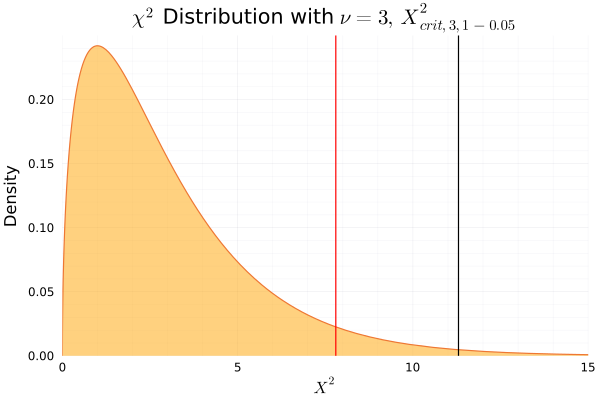

In [120]:
# Plot the χ2 distribution for 3 degrees of freedom
# Show the critical value at 7.815 and the test statistic at 11.271

plot(
    Chisq(3),
    fill=(0, .5,:orange),
    title = L"$\chi^{2}$ Distribution with $\nu = 3, \, X^{2}_{crit,3,1-0.05}$",
    xlabel = L"X^{2}",
    ylabel = "Density",
    legend = false,
    xlim = (0, 15),
    ylim = (0, 0.25)
)
plot!([7.8, 7.8], [0, 0.45], seriestype = :straightline, color = :red)
plot!([11.3, 11.3], [0, 0.45], seriestype = :straightline, color = :black)

## Exercise problems

### Problem 1

The proportion of the population of people who have had peripheral vascular surgery due to chronic arterial insufficiency who believe that continued smoking puts them at risk for amputation is thought to be $0.6$. Researchers collect data from $100$ random subjects in the population and record that $55$ believe that continued smoking puts them at risk for amputation. The researchers want to test the claim that the population proportion of people who have peripheral vascular surgery due to chronic arterial insufficiency who believe that continued smoking puts them at risk for amputation is not $60$% using a $5$% level of significance. Use a $Z$ test for proportions to test the claim that the proportion is not $60$%.

### Problem 2

Repeat Problem 1 but use the $\chi^{2}$ goodness of fit test to test the claim that the proportion is not $60$%.

### Problem 3

The proportion of students majoring in mathematics, physics, chemistry, and biology at a university is thought to be $0.2$, $0.3$, $0.25$, and $0.25$ respectively. After the first year of the COVID-19 pandemic, and a move to online education, researchers claim that the proportions have changed. They collect data from $200$ random students at the university and record the following frequencies.

- Mathematics: $45$
- Physics: $55$
- Chemistry: $52$
- Biology: $48$

Verify the researchers claims given the data above using a $5$% level of significance.